In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt 

In [3]:
"""To be implemented:
    1. 2D Wiener process
    2. Correlated GBMs
    3. Euler-Maruyama(i.e. CEV, etc ...)
"""

'To be implemented:\n    1. 2D Wiener process\n    2. Correlated GBMs\n    3. Euler-Maruyama(i.e. CEV, etc ...)\n'

#### Class: one dimensional uniform mesh

In [4]:
class OneDimUniformMesh: 
    """A one dimensional uniform mesh"""
    def __init__(self, start_point: float = 0., end_point: float = 1., spacing: float = 0.1):
        """Constructor"""
        self.start_point = start_point
        self.end_point = end_point 
        self.spacing = spacing 
        self.interval_length = end_point - start_point
        self.num_samples = int(self.interval_length / spacing + 1)
    
    def mesh(self) -> np.ndarray: 
        """Generates the mesh"""
        return np.linspace(self.start_point, self.end_point, num=self.num_samples)

#### Class: one dimensional Wiener process

In [11]:
class OneDimWienerProcess: 
    """A one dimensional Wiener process (Brownian Motion)"""
    def __init__(self, time_mesh: OneDimUniformMesh): 
        self.time_mesh = time_mesh 
    
    def sample_path(self) -> np.ndarray: 
        """Generates one random sample path of the wiener process"""
        time_spacing = self.time_mesh.spacing
        increments = np.sqrt(time_spacing) * np.random.standard_normal((self.time_mesh.num_samples) - 1)
        process = np.zeros(self.time_mesh.num_samples)
        process[1:] = np.cumsum(increments)
        return process

    def simulate_paths(self, num_simulations: int) -> np.ndarray: 
        """Generates multiple observations of a wiener process"""
        simulations = [self.sample_path() for _ in range(num_simulations)]
        result = np.vstack(simulations).T
        return result 


#### Functions for plotting

In [12]:
def plot_path(time_array: np.ndarray, path_array: np.ndarray, ax = None): 
    """Line plot of one sample path of stochastic process"""
    sb.lineplot(x=time_array, y=path_array, ax=ax) 

def plot_simulations(time_array: np.ndarray, path_matrix: np.ndarray, 
                            ax = None, show_legends: bool = False): 
    """Line plots for multiple simulated stochastic processes"""
    num_simulations = path_matrix.shape[1] 
    columns = [f'X{i}' for i in range(num_simulations)]
    simulations = pd.DataFrame(path_matrix, index=time_array, columns=columns)
    sb.lineplot(data=simulations, ax=ax, legend=show_legends)

def plot_distribution_returns(process_array: np.ndarray): 
    """Plot the distribution of returns"""
    returns = np.diff(process_array) 
    sb.displot(data=returns)

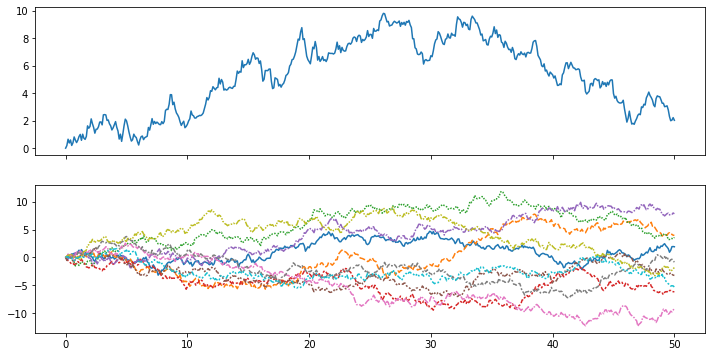

In [13]:
time = OneDimUniformMesh(start_point=0., end_point=50., spacing=.1)
wiener = OneDimWienerProcess(time)

fig, axs = plt.subplots(2, 1, sharex=True, figsize=(12, 6))
plot_path(time.mesh(), wiener.sample_path(), ax=axs[0])
plot_simulations(time.mesh(), wiener.simulate_paths(10), ax=axs[1])

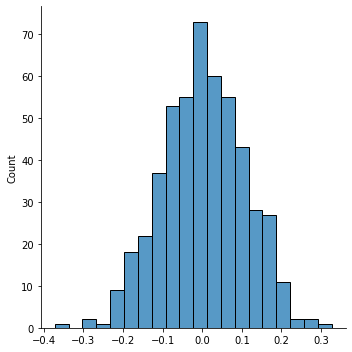

In [8]:
plot_distribution_returns(wiener.sample_path())

#### Class: geometric brownian motion

In [14]:
class GeometricBrownianMotion: 
    """A class representing a one dim solution to Black-Scholes SDE"""
    def __init__(self, mu: float, sigma: float, time_mesh: OneDimUniformMesh):
        self.mu = mu 
        self.sigma = sigma 
        self.time_mesh = time_mesh 
        self.wiener_process = OneDimWienerProcess(self.time_mesh)

    def sample_path(self, initial_value: float = 1.) -> np.ndarray:
        """Generates one path of a geometric brownian motion"""
        brownian_motion = self.wiener_process.sample_path() 
        time = self.time_mesh.mesh()
        process = (self.mu - self.sigma ** 2 / 2) * time + self.sigma * brownian_motion
        process = initial_value * np.exp(process)
        return process
        

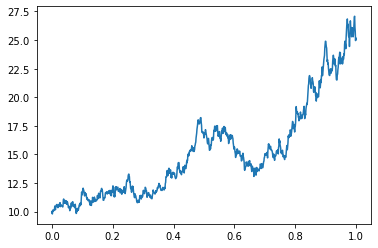

In [26]:
time = OneDimUniformMesh(start_point=0., end_point=1., spacing=0.001)
process = GeometricBrownianMotion(0.25, 0.5, time)
plot_path(time.mesh(), process.sample_path(10))